In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from google.colab.patches import cv2_imshow

In [ ]:
def meanFilter2D(data: np.array, ukuran_kernel: tuple) -> np.array:
  # ukuran image
  img_rows, img_cols = data.shape
  # ukuran kernel
  k_row, k_col = ukuran_kernel 
  # ukuran padding
  kh = k_row // 2
  kw = k_col // 2
  # generate karnel
  # kernel = np.random.randint(size=(ukuran_kernel, ukuran_kernel), low=-1, high=5)
  kernel = np.ones((k_row,k_col))/(k_row*k_col)
  # generate data padding
  dataPd = np.zeros((img_rows+kw*2, img_cols+kw*2)) 
  # gabung data padding dengan data img
  dataPd[kh:-kh, kw:-kw] = data
  # untuk data output
  dataOut = np.zeros_like(data, dtype=np.uint8)
  # melakukan perkalian dan penjumlahan
  for i in range(img_rows):
    for j in range(img_cols):
      dataXkernel = dataPd[i:i+k_row, j:j+k_col]
      dataOut[i,j] = np.sum((dataXkernel * kernel))
  # mengganti nilai < 0 = 0 karena nilai terkecil adalah 0
  dataOut[dataOut < 0] = 0
  # mengganti nilai > 255 = 255 karena nilai terbesar adalah 255
  dataOut[dataOut > 255] = 255
  return dataOut

In [ ]:
path = r'/content/drive/Othercomputers/My Laptop/Materi Kuliah/Semester 6/Biomedika/img/BloodImage_00023.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [ ]:
conv = meanFilter2D(image, (3,3))
conv

array([[ 78, 117, 116, ..., 130, 129,  86],
       [118, 177, 176, ..., 197, 195, 129],
       [119, 179, 178, ..., 198, 197, 131],
       ...,
       [131, 197, 197, ..., 205, 206, 137],
       [131, 197, 197, ..., 205, 206, 138],
       [ 87, 131, 131, ..., 137, 138,  92]], dtype=uint8)

In [ ]:
image.shape, conv.shape

((480, 640), (480, 640))

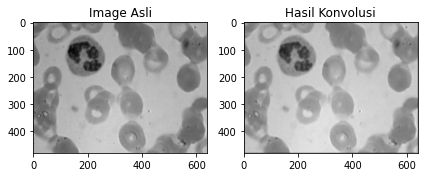

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Image Asli')
ax[1].imshow(conv, cmap=cm.gray)
ax[1].set_title('Hasil Konvolusi')
fig.tight_layout()

In [6]:
import cv2
import urllib.request
import numpy as np
url = 'https://doc-14-64-docs.googleusercontent.com/docs/securesc/7je0ma9rppgchm3srd2lob58jm4n221i/e23iasjkdvdsrsk4aicg36inb706g40c/1678276950000/11464007199956394631/11464007199956394631/1-ucQo_PDNdQ3XRrnvETfKToJJaxNA45U?e=view&ax=AB85Z1COfc27CjNz61rXOOQ_IgOhDMkveMmI0s5uJ1-71vWnVamQbyVxzMj0_JkEk2_Uo2kLmPEY5r1QCtx9MOttYkYoRYfktjaIJHV-QXb1h7L6NMFr3AkQIt-R4YwCFgynFaMNt4pRnny7zdpUpB6z8p_K0AES7an5oBB7dCff2Cb-nBT3Q1_ufLaH0z5y9pAziP6zJlBhOkL8V446ruIJgkrCUC0uNV-TVoHf420UDv1gWT6YTNf7yGG4i6gSID5is_X7gdZJAeEU4_JoVlU5iAWkbsy2dwjxy7tDr0TSPo7XU-bxZYVcY4U7Lah-jgytTQFJNYTGSRm9zZWziQwKJdi9plFpMXqCf6VaoLR4AoK0WN8duw4ar9Qgc4SvDbXSwy3r4nS5MEIP3gSoTPu9gKqcC8mIkimaqc4Qx1vN7KCafTaeaaSeZmqeS8GaUk0TH_2XhCTb7OzV0fXUBmAHqMYFTZl7aMQDixLVzVFGarf4kddDoVzy7aV-wroKOIeV4f9B_aqFV9GbGiLmn0k0OEUL3NTUYpOJ1vsF0VakmYwF7z9knJbbrNpxMVDWF32SvMup54LhXtfmrQ-GnFQ2MMFZSeLqh-5i95xnxUJPogRHxhEQ6Gruz2q9ru7BnE0pHGRfhXT61MRAH0dQ4Uk2gSr7PJQcayX78KorR4PjScJCMSO3CuEzjOXM67SCXtBb4GDXCTwzpj6G_STtH7Ixkp3x2v2ySmnGN-sKBzA6eWxIOPnTKAN7amJ-LbKmkf8W67mYgL7vNwtIr61st_mUgktHIPF15YCnWdCGIlo4-u7LdblUAf0zEyKzK_PpfaKCpLwdwdUpBm_qZDCkY_lydcKqyk7voFUL9hk8h9CWDLdG8-3pMKkL4JxLYuhQ3QI&uuid=397609d6-e8c7-4b7f-b426-8508883c0fed&authuser=0&nonce=g1fhb1dbgvqai&user=11464007199956394631&hash=5jdlr7dmmdp9pj72khu7qo6ma6darbij'
url_response = urllib.request.urlopen(url)
img = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)

In [7]:
img.shape

AttributeError: ignored